In [1]:
# %%html
# <style>
# .output_wrapper, .output {
#     height:auto !important;
#     max-height:1000px;  /* your desired max-height here */
# }
# .output_scroll {
#     box-shadow:none !important;
#     webkit-box-shadow:none !important;
# }
# </style>

In [2]:
import tensorflow as tf

In [3]:
import melt
import numpy as np
import gezi
from gezi import tqdm
# %matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import umap

In [4]:
from tensorflow.python import pywrap_tensorflow
root = '/search/odin/publicData/CloudS/mkyuwen/rank_online/data/video_hour_sgsapp_v1/models/1'
model_dir = root + '/2020091522'
var_name = 'embeddings'
checkpoint_path = melt.get_model_path(model_dir)
reader = pywrap_tensorflow.NewCheckpointReader(checkpoint_path)
var_to_shape_map = reader.get_variable_to_shape_map()
for key in var_to_shape_map:
  if var_name in key:
    print("tensor_name: ", key)
#     print(reader.get_tensor(key))

tensor_name:  wide_deep/wide_1/emb/emb/embeddings2
tensor_name:  wide_deep/wide_1/emb/emb/embeddings
tensor_name:  wide_deep/wide/emb/emb/embeddings2
tensor_name:  wide_deep/wide/emb/emb/embeddings
tensor_name:  wide_deep/deep/weekday_emb/embeddings
tensor_name:  wide_deep/deep/user_emb/embeddings
tensor_name:  wide_deep/deep/topic_emb/embeddings
tensor_name:  wide_deep/deep/time_emb/embeddings
tensor_name:  wide_deep/deep/mktest_kw_emb/embeddings
tensor_name:  wide_deep/deep/kw_emb/embeddings
tensor_name:  wide_deep/deep/emb/emb/embeddings2
tensor_name:  wide_deep/deep/emb/emb/embeddings
tensor_name:  wide_deep/deep/doc_emb/embeddings2
tensor_name:  wide_deep/deep/doc_emb/embeddings
tensor_name:  wide_deep/deep/distribution_id_emb/embeddings
tensor_name:  OptimizeLoss___0/wide_deep/deep/emb/emb/embeddings/Adam
tensor_name:  OptimizeLoss___0_1/wide_deep/wide_1/emb/emb/embeddings/Adam
tensor_name:  wide_deep/deep/user_emb/embeddings2
tensor_name:  OptimizeLoss___0/wide_deep/deep/cold_em

In [5]:
# reader.get_tensor('wide_deep/deep/doc_emb/embeddings2')

In [6]:
def visualize_embeddings(emb_l, 
                              output_dir    = "/home/gezi/tmp",
                              max_size      = 10000000, 
                              umap_metric   = "euclidean",
                              use_max_count = True):

  E = emb_l
  print("umap", E.shape)

  # create histogram of norms
  bins = 50
  norms = [np.linalg.norm(E[i], ord=2) for i in tqdm(range(0,E.shape[0]))]
#        plt.hist(norms, bins = bins)
#        plt.title("Cat norm hist var. "+str(k))
  hist, bins = np.histogram(norms, bins=bins)
#     print(norms)
  print(hist)
  print(bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

  plt.figure(figsize=(8,8))
  plt.title("Categorical norms: " + "cardinality ")
  plt.hist(norms, bins=logbins)
  plt.xscale("log")
#        plt.legend()
  plt.show()
  plt.savefig(output_dir+"/cat-norm-histogram.png")
#     plt.close()

#     n_vis = min(max_size, E.shape[0])
#     min_cnt = 0

# #        reducer = umap.UMAP(random_state=42, n_neighbors=25, min_dist=0.1)
#     reducer = umap.UMAP(random_state=42, metric=umap_metric)

#     if use_max_count is False or n_vis == E.shape[0]:
#         Y = reducer.fit_transform(E[:n_vis,:])

#     plt.figure(figsize=(8,8))

#     linewidth = 0
#     size      = 1

#     if Y.shape[0] < 2500:
#         linewidth = 1 
#         size      = 5


#     plt.scatter(-Y[:,0], -Y[:,1], s=size, marker=".", linewidth=linewidth)

#     plt.title("UMAP: categorical var. " + "  (" + str(n_vis) + " of " + str(E.shape[0]) + ", min count " + str(min_cnt) + ")")
#     plt.show()
#     plt.savefig(output_dir + "/cat-" + str(n_vis) + "-of-" + str(E.shape[0]) + "-umap.png")
#     plt.close()
  return norms

umap (3000001, 32)



[ 630645 1212866  501121  256279  142109   81015   49103   31994   22325
   16346   12254    9168    7111    5713    4587    3854    3102    2574
    1993    1522    1202     899     640     449     324     229     149
     111      89      62      54      31      24      18      10      15
       4       4       0       1       0       2       1       0       0
       1       0       0       0       1]
[0.09766602 0.2110986  0.32453117 0.43796375 0.5513963  0.6648289
 0.7782615  0.891694   1.0051266  1.1185592  1.2319918  1.3454243
 1.4588569  1.5722895  1.6857221  1.7991546  1.9125872  2.0260198
 2.1394525  2.2528849  2.3663175  2.4797502  2.5931826  2.7066152
 2.8200479  2.9334803  3.046913   3.1603456  3.2737782  3.3872106
 3.5006433  3.614076   3.7275083  3.840941   3.9543736  4.0678062
 4.1812387  4.294671   4.408104   4.5215364  4.6349688  4.7484016
 4.861834   4.975267   5.0886993  5.2021317  5.3155646  5.428997
 5.5424294  5.6558623  5.7692947 ]


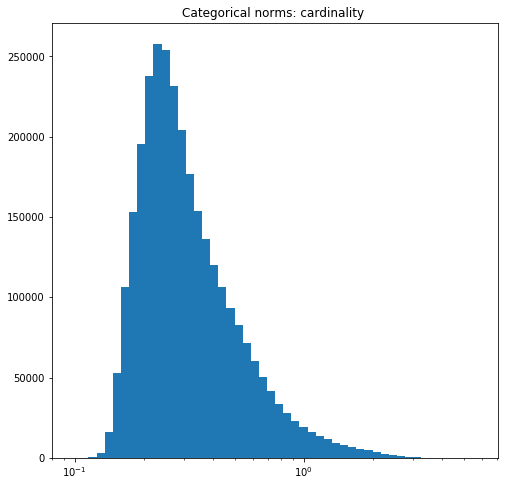

<Figure size 432x288 with 0 Axes>

In [7]:
norms_doc = visualize_embeddings(reader.get_tensor('wide_deep/deep/doc_emb/embeddings'))

In [8]:
norms_user= visualize_embeddings(reader.get_tensor('wide_deep/deep/user_emb/embeddings'))

umap (3000001, 32)


KeyboardInterrupt: 

In [ ]:
norms_kw= visualize_embeddings(reader.get_tensor('wide_deep/deep/mktest_kw_emb/embeddings'))

In [ ]:
from tensorflow.python import pywrap_tensorflow
root = '/search/odin/publicData/CloudS/mkyuwen/rank_online/data/video_hour_sgsapp_v1/models/1'
model_dir = root + '/2020071522'
var_name = 'embeddings'
checkpoint_path = melt.get_model_path(model_dir)
reader = pywrap_tensorflow.NewCheckpointReader(checkpoint_path)
var_to_shape_map = reader.get_variable_to_shape_map()

In [ ]:
norms_doc2 = visualize_embeddings(reader.get_tensor('wide_deep/deep/doc_emb/embeddings'))

In [ ]:
norms_user2 = visualize_embeddings(reader.get_tensor('wide_deep/deep/user_emb/embeddings'))

In [ ]:
norms_kw2 = visualize_embeddings(reader.get_tensor('wide_deep/deep/mktest_kw_emb/embeddings'))

In [ ]:
np.sum(np.asarray(norms_doc) - np.asarray(norms_doc2) < 0) / len(norms_doc)

In [ ]:
np.sum(np.asarray(norms_user) - np.asarray(norms_user2) < 0) / len(norms_user)

In [ ]:
np.argsort(norms_doc)

In [ ]:
norms_doc[1994989]

In [ ]:
norms_doc[1024905]

In [ ]:
gezi.metrics.inverse_ratio(np.asarray(norms_doc), np.asarray(norms_doc2))

In [ ]:
gezi.metrics.inverse_ratio(np.asarray(norms_user), np.asarray(norms_user2))

In [ ]:
gezi.metrics.inverse_ratio(np.asarray(norms_kw), np.asarray(norms_kw2))

In [ ]:
norms_doc2[1994989]

In [ ]:
norms_doc2[1024905]

In [ ]:
np.argsort(norms_doc2)

In [ ]:
norms_doc[2527765]

In [ ]:
norms_doc[1360745]

In [ ]:
norms_doc2[1360745]

In [ ]:
norms_doc[327539]

In [ ]:
norms_doc2[327539]

In [ ]:
gezi.metrics.inverse_ratio(np.argsort(norms_kw), np.argsort(norms_kw2))

In [ ]:
np.argsort(norms_kw2)

In [ ]:
norms_kw2[312727]

In [ ]:
norms_kw2[366982]

In [ ]:
norms_kw[312727]

In [ ]:
norms_kw[366982]

In [ ]:
np.sum(np.asarray(norms_kw) - np.asarray(norms_kw2) < 0) / len(norms_kw)